# Sección 1.  Compresión sin pérdida de información para imágenes en blanco y negro

> Dado un conjunto de 15 imágenes en blanco y negro, realizar las siguientes actividades:

1. Aplicar algún método de filtrado o de morfología matemática para obtener contornos
   simples.
2. Obtener los códigos F8, F4, AF8, VCC y 3OT que representen a los objetos contenidos.
3. Obtener los siguientes valores:
   a) Longitud de la cadena
   b) Entropía, H.
4. Aplicar los codificadores entrópicos, Huffman y aritmético, a los códigos obtenidos y
   calcular:
   a) Cantidad de bytes obtenidos, B.
   b) Cantidad de bytes/símbolo, J (valor esperado de la probabilidad de los símbolos).
5. Realizar una gráfica de frecuencias vs. símbolos utilizados por cada código obtenido.
   Ojo: colocar una sola gráfica por código en el reporte que considere un promedio global.
6. Obtener la razón de compresión respecto al formato PNG.
7. Hacer una tabla de comparaciones de la compresión realizada a la imagen debida a
   cada código, así como al formato JBIG y JBIG2 (previa búsqueda de aplicaciones que
   contengan estos formatos. En caso de encontrarlo en Internet, indicar la liga).


## 1. F8


In [1]:
import cv2
import numpy as np
imagen = cv2.imread('./ImagenesABinarizar/IMG10.png')
gray = cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
ret,th = cv2.threshold(gray,200,255,cv2.THRESH_BINARY_INV)
mat = []
mat = th

my_list = list(map(lambda x: x / 255, mat))


contornos, jerarquia = cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

# for i in range(len(contornos)):
#     cv2.drawContours(imagen,contornos,i,(0,0,255),3)
#     #print('contorno',i,'=',len(contornos[i]))
#     cv2.imshow('imagen',imagen)
#     cv2.waitKey(0)

cv2.imshow('th',th)
cv2.waitKey(0)
cv2.destroyAllWindows()

F8 = ''
i, j = 0, 0
iy, ix, = 0, 0
f = False

for i in range(50):
    if(f):
        break
    for j in range(len(my_list[0])):
        if(my_list[i][j]==1):
            iy, ix = i, j
            f = True
            break

i -= 1
k, l = 0, 0
f = False
terminar = False
izq = True
z = 0

while(terminar == False):
    if(z>0):
        if(i == iy and j == ix):
            terminar = True
            break
    
    f = False
    #print('Z',z)
    #print('i',i,'j',j)
    #print(izq)
    #print('i',i,'j',j)
    if(izq):
        for m in range(-1,2):
            if(i-1==k and j+m==l):
                continue
            else:
                if(my_list[i-1][j+m]==1):
                    if(m==-1): 
                        izq = False
                        F8 += '5'
                    if(m==0): F8 += '6'
                    if(m==1): F8 += '7'
                    # print(-1,m) 
                    k, l = i, j
                    i, j = i-1,j+m
                    f = True
                    break
            
        if(i==k and j+1==l):
            continue
        else:
            if(my_list[i][j+1]==1 and f==False):
                F8 += '0'
                # print(0,1) 
                k, l = i, j
                i, j = i,j+1
                f = True
        
        if(f == False):
                for m in range(-1,2):
                    if(i+1==k and j-m==l):
                        continue
                    else:
                        if(my_list[i+1][j-m]==1):
                            if(m==-1): F8 += '1'
                            if(m==0): 
                                F8 += '2'
                                izq = False
                            if(m==1): 
                                F8 += '3'
                                izq = False
                            # print(1,-m) 
                            k, l = i, j
                            i, j = i+1,j-m
                            f = True
                            break
            
        if(i==k and j-1==l):
            continue
        else:
            if(my_list[i][j-1]==1 and f==False):
                F8 += '4'
                # print(0,-1) 
                k, l = i, j
                i, j = i,j-1
                izq = False
                f = True
        
        if(f == False):
            temp1, temp2 = k, l
            k, l = i, j
            i, j = k, l
            
        
     
                
    else:
        if(f == False):
            for m in range(-1,2):
                if(i+1==k and j-m==l):
                    continue
                else:
                    if(my_list[i+1][j-m]==1):
                        if(m==-1): 
                            izq = True
                            F8 += '1'
                        if(m==0): F8 += '2'
                        if(m==1): 
                            F8 += '3'
                        # print(1,-m) 
                        k, l = i, j
                        i, j = i+1,j-m
                        f = True
                        break
        
        if(i==k and j-1==l):
            continue
        else:
            if(my_list[i][j-1]==1 and f==False):
                F8 += '4'
                # print(0,-1) 
                k, l = i, j
                i, j = i,j-1
                f = True

        if(f == False):          
            for m in range(-1,2):
                if(i-1==k and j+m==l):
                    continue
                else:
                    if(my_list[i-1][j+m]==1):
                        if(m==-1): 
                            F8 += '5'
                        if(m==0): 
                            F8 += '6'
                            izq = True
                        if(m==1): 
                            izq = True
                            F8 += '7'
                        # print(-1,m) 
                        k, l = i, j
                        i, j = i-1,j+m
                        f = True
                        break
        
        if(i==k and j+1==l):
            continue
        else:
            if(my_list[i][j+1]==1 and f==False):
                F8 += '0'
                # print(0,1) 
                k, l = i, j
                i, j = i,j+1
                izq = True
                f = True 
        
    z += 1

AF8 = F8

print(F8)

0000001001010110112112122100002333323433313544444544555444444344343436766767677075554454447770707000000765655


## 1. F4


In [2]:
F4 = ''
i, j = 0, 0
iy, ix, = 0, 0
f = False

for i in range(50):
    if(f):
        break
    for j in range(len(my_list[0])):
        if(my_list[i][j]==1):
            iy, ix = i, j
            f = True
            break

i -= 1
k, l = 0, 0
f = False
terminar = False
izq = True
z = 0

while(terminar == False):
    if(z>0):
        if(i == iy and j == ix):
            terminar = True
            break
    
    f = False
    #print('Z',z)
    #print('i',i,'j',j)
    #print(izq)
    #print('i',i,'j',j)
    if(izq):
        for m in range(-1,2):
            if(i-1==k and j+m==l):
                continue
            else:
                if(my_list[i-1][j+m]==1):
                    if(m==-1): 
                        izq = False
                        F4 += '32' #32  Arriba y luego izquierda 
                    if(m==0): F4 += '3' #3 Arriba 
                    if(m==1): F4 += '03' #03 Derecha arriba 
                    # print(-1,m) 
                    k, l = i, j
                    i, j = i-1,j+m
                    f = True
                    break
            
        if(i==k and j+1==l):
            continue
        else:
            if(my_list[i][j+1]==1 and f==False):
                F4 += '0' #Derecha 
                # print(0,1) 
                k, l = i, j
                i, j = i,j+1
                f = True
        
        if(f == False):
                for m in range(-1,2):
                    if(i+1==k and j-m==l):
                        continue
                    else:
                        if(my_list[i+1][j-m]==1):
                            if(m==-1): 
                                F4 += '10' #10 Abajo derecha 
                            if(m==0): 
                                F4 += '1' #Abajo 
                                izq = False
                            if(m==1): 
                                F4 += '21' #Izquierda abajo 
                                izq = False
                            # print(1,-m) 
                            k, l = i, j
                            i, j = i+1,j-m
                            f = True
                            break
            
        if(i==k and j-1==l):
            continue
        else:
            if(my_list[i][j-1]==1 and f==False):
                F4 += '2' #Izquierda 
                # print(0,-1) 
                k, l = i, j
                i, j = i,j-1
                izq = False
                f = True
        
        if(f == False):
            temp1, temp2 = k, l
            k, l = i, j
            i, j = k, l
            
        
     
                
    else:
        if(f == False):
            for m in range(-1,2):
                if(i+1==k and j-m==l):
                    continue
                else:
                    if(my_list[i+1][j-m]==1):
                        if(m==-1): 
                            izq = True
                            F4 += '10' #01 Derecha abajo 
                        if(m==0): F4 += '1' #1 abajo 
                        if(m==1): 
                            F4 += '21' #12  abajo izquierda 
                        # print(1,-m) 
                        k, l = i, j
                        i, j = i+1,j-m
                        f = True
                        break
        
        if(i==k and j-1==l):
            continue
        else:
            if(my_list[i][j-1]==1 and f==False):
                F4 += '2' #2 izquierda 
                # print(0,-1) 
                k, l = i, j
                i, j = i,j-1
                f = True

        if(f == False):          
            for m in range(-1,2):
                if(i-1==k and j+m==l):
                    continue
                else:
                    if(my_list[i-1][j+m]==1):
                        if(m==-1): 
                            F4 += '32' #23 izquierda arriba 
                        if(m==0): 
                            F4 += '3' #3 arriba 
                            izq = True
                        if(m==1): 
                            izq = True
                            F4 += '03' #30 arriba derecha 
                        # print(-1,m) 
                        k, l = i, j
                        i, j = i-1,j+m
                        f = True
                        break
        
        if(i==k and j+1==l):
            continue
        else:
            if(my_list[i][j+1]==1 and f==False):
                F4 += '0' #0 derecha 
                # print(0,1) 
                k, l = i, j
                i, j = i,j+1
                izq = True
                f = True 
        
    z += 1
    
print(F4)

00000010001001001010010101101011011100000121212121121221212110213222222322232323222222221222122122130333033033030300332323222322220303030030030000000333233232


## 1. AF8


In [3]:
#AF8
Af8 = []
for i in range(0,len(AF8)):
    if int(F8[i]) >= int(F8[i-1]):
        Af8.append(int(F8[i]) - int(F8[i-1])) 
    if int(F8[i]) < int(F8[i-1]):
        Af8.append((int(F8[i]) + 8) - (int(F8[i-1])))    
AF8="".join(map(str, Af8))
print(AF8)

3000001701717107101701710770002100071170062270000170100700000710717173170171710176007017003001717100000777170


## 1. 3OT


In [4]:
referencia= 3
ot3=[]
b = True
for i in range(1,len(F4) ):
    if int(F4[i-1])==int(F4[i]):
        ot3.append(0)
    else:
        if int(F4[i])==int(referencia):
            referencia= F4[i-1]
            ot3.append(1)
            if (b == True): b=False 
            else: b = True 
        else:
                referencia = F4[i-1]
                if b : 
                    ot3.append(0)
                    ot3.append(2)
                else:
                    
                    if int(F4[i-1])-int(F4[i])==2 or int(F4[i-1])-int(F4[i])==-2 :
                        ot3.append(1)
                        if (b == True): b=False 
                        else: b = True 
                        ot3.append(2)
                        referencia = int(F4[i-1])+1
                    else: 
                        ot3[-1]=2
if  int(F4[-1])-int(F4[0])==2 or int(F4[-1])-int(F4[0])==-2:
    ot3.append(1)
    ot3.append(2)
elif int(F4[0]) == int(referencia):
    ot3.append(1)
else:
    ot3.append(2)

OT3="".join(map(str, ot3))
print(OT3)

         

000000210011011011110111110111101100100001021111111011101111121211210000011001111110000002100110110112021001101101111101211110011000121111110110110000001021011112


## 1. VCC


In [5]:
VCC=""
bo='1'
for i in range(len(ot3)):
    if ot3[i]==0:VCC += '0'
    if ot3[i]==1:
        if bo=='1':bo='2'
        elif bo=='2':bo='1'
        VCC += bo
    if ot3[i]==2:VCC+= bo
print(VCC)

000000120012012012120121210212102100200001012121212012102121221121120000012001212120000002100210210211012001201201212102212120012000112121210210210000002021021211


### 3. Entropía y Longitud de la cadena


In [6]:
import numpy as np

cadenas = [F8,F4,AF8,OT3,VCC]
metodos = ['F8','F4','AF8','3OT','VCC']
simbolos = [
    [0,1,2,3,4,5,6,7],
    [0,1,2,3],
    [0,1,2,3,4,5,6,7],
    [0,1,2],
    [0,1,2]
]

i = 0
fF8, fF4, fAF8, f3OT, fVCC = [], [], [], [], []

for m in simbolos:
    # print(' ',metodos[i])
    #print(cadenas[i])
    for s in m:
        if i == 0: fF8.append([s, cadenas[i].count(str(s)), cadenas[i].count(str(s))/len(F8)])
        if i == 1: fF4.append([s, cadenas[i].count(str(s)), cadenas[i].count(str(s))/len(F4)])
        if i == 2: fAF8.append([s, cadenas[i].count(str(s)), cadenas[i].count(str(s))/len(AF8)])
        if i == 3: f3OT.append([s, cadenas[i].count(str(s)), cadenas[i].count(str(s))/len(OT3)])
        if i == 4: fVCC.append([s, cadenas[i].count(str(s)), cadenas[i].count(str(s))/len(VCC)])
        # print(s, '  ', cadenas[i].count(str(s)), '  ', cadenas[i].count(str(s))/totalF)
    i += 1


hF8, hF4, hAF8, h3OT, hVCC = 0, 0, 0, 0, 0
for p in fF8:
    if p[2] != 0:
        hF8 -= p[2]*np.log2(p[2])
for p in fF4:
    if p[2] != 0:
        hF4 -= p[2]*np.log2(p[2])
for p in fAF8:
    if p[2] != 0:
        hAF8 -= p[2]*np.log2(p[2])
for p in f3OT:
    if p[2] != 0:
        h3OT -= p[2]*np.log2(p[2])
for p in fVCC:
    if p[2] != 0:
        hVCC -= p[2]*np.log2(p[2])

tabla_ent_lon = [
    [hF8, len(F8)],
    [hF4, len(F4)],
    [hAF8, len(AF8)],
    [h3OT, len(OT3)],
    [hVCC, len(VCC)],
]

i = 0

print('Método  Entropía  Longitud')
for x in tabla_ent_lon:
    print(' ',metodos[i],'\t {:.3f}'.format(x[0]),'\t   ',x[1])
    i += 1

Método  Entropía  Longitud
  F8 	 2.856 	    109
  F4 	 1.966 	    158
  AF8 	 1.918 	    109
  3OT 	 1.280 	    162
  VCC 	 1.580 	    162


### 4. Huffman y aritmético 

In [7]:
import heapq
 
print('Códigos de Huffman') 
huF8, huF4, huAF8, hu3OT, huVCC = [], [], [], [], []
temp = []
class node:
    def __init__(self, freq, symbol, left=None, right=None):
        # frequency of symbol
        self.freq = freq
 
        # symbol name (character)
        self.symbol = symbol
 
        # node left of current node
        self.left = left
 
        # node right of current node
        self.right = right
 
        # tree direction (0/1)
        self.huff = ''
         
    def __lt__(self, nxt):
        return self.freq < nxt.freq
         
 
# utility function to print huffman
# codes for all symbols in the newly
# created Huffman tree
def printNodes(node, val=''):
     
    # huffman code for current node
    newVal = val + str(node.huff)
 
    # if node is not an edge node
    # then traverse inside it
    if(node.left):
        printNodes(node.left, newVal)
    if(node.right):
        printNodes(node.right, newVal)
 
        # if node is edge node then
        # display its huffman code
    if(not node.left and not node.right):
        temp.append([node.symbol, newVal])
        #print(f"{node.symbol} = {newVal}")
 
def obtenerHuffman(metodo,simbolos,frecuencias):
    print(metodo)
    i = 0
    for x in simbolos:
        simbolos[i] = str(x) 
        i += 1
    #print(simbolos)

    # characters for huffman tree
    chars = simbolos
    
    frec = []
    for x in frecuencias:
        frec.append(x[1])
    #print(frec)
    # frequency of characters
    freq = frec
    
    # list containing unused nodes
    nodes = []
    
    # converting characters and frequencies
    # into huffman tree nodes
    for x in range(len(chars)):
        heapq.heappush(nodes, node(freq[x], chars[x]))
    
    while len(nodes) > 1:
        
        # sort all the nodes in ascending order
        # based on their frequency
        left = heapq.heappop(nodes)
        right = heapq.heappop(nodes)
    
        # assign directional value to these nodes
        left.huff = 0
        right.huff = 1
    
        # combine the 2 smallest nodes to create
        # new node as their parent
        newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)
    
        heapq.heappush(nodes, newNode)
    
    # Huffman Tree is ready!
    printNodes(nodes[0])

    return temp

for i in range(5):
    temp = []
    l = 0
    vec = []
    if i == 0: 
        huF8 = obtenerHuffman(metodos[i],simbolos[i],fF8)
        print(huF8)
        vec = list(cadenas[i])
        for j in range(len(vec)):
            for k in range(len(huF8)):
                if vec[j] == huF8[k][0]:
                    vec[j] = huF8[k][1]

        chF8="".join(map(str, vec))
        print(chF8,'\n')      
        
        
 
    if i == 1: 
        huF4 = obtenerHuffman(metodos[i],simbolos[i],fF4)
        print(huF4)
        vec = list(cadenas[i])
        for j in range(len(vec)):
            for k in range(len(huF4)):
                if vec[j] == huF4[k][0]:
                    vec[j] = huF4[k][1]

        chF4="".join(map(str, vec))
        print(chF4,'\n')

    if i == 2: 
        huAF8 = obtenerHuffman(metodos[i],simbolos[i],fAF8)
        print(huAF8)
        vec = list(cadenas[i])
        for j in range(len(vec)):
            for k in range(len(huAF8)):
                if vec[j] == huAF8[k][0]:
                    vec[j] = huAF8[k][1]

        chAF8="".join(map(str, vec))
        print(chAF8,'\n')
    if i == 3: 
        hu3OT = obtenerHuffman(metodos[i],simbolos[i],f3OT)
        print(hu3OT)
        vec = list(cadenas[i])
        for j in range(len(vec)):
            for k in range(len(hu3OT)):
                if vec[j] == hu3OT[k][0]:
                    vec[j] = hu3OT[k][1]

        ch3OT="".join(map(str, vec))
        print(ch3OT,'\n')
    if i == 4: 
        huVCC = obtenerHuffman(metodos[i],simbolos[i],fVCC)
        print(huVCC)
        vec = list(cadenas[i])
        for j in range(len(vec)):
            for k in range(len(huVCC)):
                if vec[j] == huVCC[k][0]:
                    vec[j] = huVCC[k][1]

        chVCC="".join(map(str, vec))
        print(chVCC,'\n')



for i in range(5):
    l = 0
    obits = 0.0
    hbits = 0.0
    if i == 0:
        print('F8')
        for j in range(len(fF8)):
            l = 3
            obits += fF8[j][2] * l
            for k in range(len(huF8)):
                if str(fF8[j][0]) == huF8[k][0]:
                    l = len(huF8[k][1])
                    hbits += fF8[j][2] * l
        print('Cantidad de bits total: ',len(F8)*3)
        print('Cantidad original de bits por símbolo: ',obits)
        print('Cantidad de bits total (con compresión): ',len(chF8))
        print('Cantidad comprimida de bits por símbolo: ',hbits,'\n')

    if i == 1:
        print('F4')
        for j in range(len(fF4)):
            l = 2
            obits += fF4[j][2] * l
            for k in range(len(huF4)):
                if str(fF4[j][0]) == huF4[k][0]:
                    l = len(huF4[k][1])
                    hbits += fF4[j][2] * l
        print('Cantidad de bits total: ',len(F4)*2)
        print('Cantidad original de bits por símbolo: ',obits)
        print('Cantidad de bits total (con compresión): ',len(chF8))
        print('Cantidad comprimida de bits por símbolo: ',hbits,'\n')

    if i == 2:
        print('AF8')
        for j in range(len(fAF8)):
            l = 3
            obits += fAF8[j][2] * l
            for k in range(len(huAF8)):
                if str(fAF8[j][0]) == huAF8[k][0]:
                    l = len(huAF8[k][1])
                    hbits += fAF8[j][2] * l
        print('Cantidad de bits total: ',len(AF8)*3)
        print('Cantidad original de bits por símbolo: ',obits)
        print('Cantidad de bits total (con compresión): ',len(chAF8))
        print('Cantidad comprimida de bits por símbolo: ',hbits,'\n')

    if i == 3:
        print('3OT')
        for j in range(len(f3OT)):
            l = 2
            obits += f3OT[j][2] * l
            for k in range(len(hu3OT)):
                if str(f3OT[j][0]) == hu3OT[k][0]:
                    l = len(hu3OT[k][1])
                    hbits += f3OT[j][2] * l
        print('Cantidad de bits total: ',len(OT3)*2)
        print('Cantidad original de bits por símbolo: ',obits)
        print('Cantidad de bits total (con compresión): ',len(ch3OT))
        print('Cantidad comprimida de bits por símbolo: ',hbits,'\n')

    if i == 4:
        print('VCC')
        for j in range(len(fVCC)):
            l = 2
            obits += fVCC[j][2] * l
            for k in range(len(huVCC)):
                if str(fVCC[j][0]) == huVCC[k][0]:
                    l = len(huVCC[k][1])
                    hbits += fVCC[j][2] * l
        print('Cantidad de bits total: ',len(VCC)*2)
        print('Cantidad original de bits por símbolo: ',obits)
        print('Cantidad de bits total (con compresión): ',len(chVCC))
        print('Cantidad comprimida de bits por símbolo: ',hbits,'\n')





Códigos de Huffman
F8
[['1', '000'], ['5', '001'], ['0', '01'], ['7', '100'], ['2', '1010'], ['6', '1011'], ['3', '110'], ['4', '111']]
0101010101010000101000010000100000001000000101000000010100001010101000001010101101011011011011010101101111101101100001100011111111111111110011111110010010011111111111111111111101111111101111101111101011100101110111001011100101110010001100001001001111111001111111111100100100011000110001010101010110010110011011001001 

F4
[['1', '00'], ['3', '01'], ['0', '10'], ['2', '11']]
1010101010100010101000101000101000100010100010001000001000100000100000001010101010001100110011001100001100111100110011000010110001111111111111011111110111011101111111111111111100111111001111001111000110010101100101100101100110011010010111011101111111011111111110011001100110100110100110101010101010010101110101110111 

AF8
[['0', '0'], ['7', '10'], ['3', '1100'], ['4', '1101000'], ['5', '1101001'], ['6', '110101'], ['2', '11011'], ['1', '111']]
110000000111100111101111011101011101111001

### 5. Gráfica de frecuencias vs símbolos

[0.22018348623853212, 0.11009174311926606, 0.05504587155963303, 0.11926605504587157, 0.21100917431192662, 0.11009174311926606, 0.06422018348623854, 0.11009174311926606]
[0.3037974683544304, 0.1962025316455696, 0.3037974683544304, 0.1962025316455696, 0, 0, 0, 0]
[0.42201834862385323, 0.23853211009174313, 0.027522935779816515, 0.027522935779816515, 0.0, 0.0, 0.01834862385321101, 0.26605504587155965]


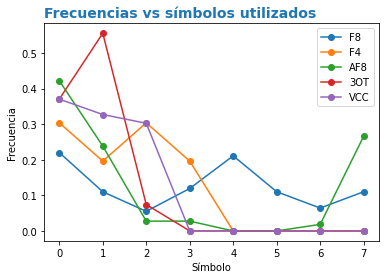

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
dias = ['0', '1', '2', '3', '4', '5', '6', '7']
ffF8 = [fila[2] for fila in fF8]
ffF4 = [fila[2] for fila in fF4]
for i in range(4):
    ffF4.append(0)
ffAF8 = [fila[2] for fila in fAF8]
ff3OT = [fila[2] for fila in f3OT]
for i in range(5):
    ff3OT.append(0)
ffVCC = [fila[2] for fila in fVCC]
for i in range(5):
    ffVCC.append(0)

print(ffF8)
print(ffF4)
print(ffAF8)
temperaturas = {'F8': ffF8, 'F4': ffF4, 'AF8': ffAF8, '3OT': ff3OT, 'VCC': ffVCC}
ax.plot(dias, temperaturas['F8'], marker = 'o', label = 'F8')
ax.plot(dias, temperaturas['F4'], marker = 'o', label = 'F4')
ax.plot(dias, temperaturas['AF8'], marker = 'o', label = 'AF8')
ax.plot(dias, temperaturas['3OT'], marker = 'o', label = '3OT')
ax.plot(dias, temperaturas['VCC'], marker = 'o', label = 'VCC')
ax.legend(loc = 'upper right')
ax.set_title('Frecuencias vs símbolos utilizados', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("Símbolo")
ax.set_ylabel("Frecuencia")
plt.show()

### 6. Razón de compresión PNG

In [9]:
sizefile = len(my_list)*len(my_list[0])

razones = []
razones.append(len(chF8)/sizefile)
razones.append(len(chF4)/sizefile)
razones.append(len(chAF8)/sizefile)
razones.append(len(ch3OT)/sizefile)
razones.append(len(chVCC)/sizefile)

print('Razones de compresión')
for i in range(len(razones)):
    print(metodos[i])
    if i==0: print(len(chF8),'/',sizefile, '=',razones[i])
    if i==1: print(len(chF4),'/',sizefile, '=',razones[i])
    if i==2: print(len(chAF8),'/',sizefile, '=',razones[i])
    if i==3: print(len(ch3OT),'/',sizefile, '=',razones[i])
    if i==4: print(len(chVCC),'/',sizefile, '=',razones[i])
    print()



Razones de compresión
F8
316 / 1240 = 0.25483870967741934

F4
316 / 1240 = 0.25483870967741934

AF8
221 / 1240 = 0.1782258064516129

3OT
234 / 1240 = 0.18870967741935485

VCC
264 / 1240 = 0.2129032258064516



### 7. Tabla de comparaciones de compresión

110


# Sección 2. Compresión con pérdida de información para imágenes en niveles de grises

> Dado un conjunto de 15 imágenes en escala de grises, realizar los siguientes 
experimentos:
 
1. Posterizar las imágenes a un nivel en el que visualmente la imagen no aparezca con 
pérdida de información. 
2. Obtener los histogramas, tanto de las imágenes originales, como de las posterizadas. 
3. Compactar las imágenes posterizadas al mínimo nivel encontrado 
4. Obtener el código F26 de cada una de las imágenes posterizadas 
5. Calcular el error cometido entre la imagen (posterizada y compactada), y la imagen 
original. 
Nota. Se puede realizar algún otro procesamiento como ecualización, o algún filtrado.
Indicar claramente si se hizo.
6. Aplicar los algoritmos Huffman y aritmético 
7. Obtener la razón de compresión respecto a JPEG 